In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

buy = pd.read_csv('buy.csv')
buy.columns = ['age' , 'pay' , 'buy_flag']
buy.head() 

,age,pay,buy_flag
0,26,160,구매
1,35,210,비구매
2,26,220,비구매
3,29,260,구매
4,22,110,비구매


In [2]:
buy_int = np.array([0] * len(buy))
buy_int[buy.buy_flag == '구매'] = 1
buy_int[buy.buy_flag == '비구매'] = 0
buy_int

array([1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0])

In [3]:
buy.buy_flag = buy_int
test_buy = buy

In [4]:
# 데이터 정규화 필요
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()
scaler.fit(buy)

buy = scaler.transform(buy)

In [5]:
buy = pd.DataFrame(buy) 

In [11]:
buy.columns = ['age' , 'pay' , 'buy_flag']
test_buy

,age,pay,buy_flag
0,26,160,1
1,35,210,0
2,26,220,0
3,29,260,1
4,22,110,0
5,32,210,0
6,37,310,1
7,21,110,0
8,28,210,0
9,31,260,1


In [7]:
X = buy.iloc[:, [1,2]].values  
y = buy.iloc[:, 0].values  

X_test = test_buy.iloc[:, [1,2]].values  
y_test = test_buy.iloc[:, 0].values  


In [8]:
X_test , y_test

(array([[160,   1],
        [210,   0],
        [220,   0],
        [260,   1],
        [110,   0],
        [210,   0],
        [310,   1],
        [110,   0],
        [210,   0],
        [260,   1],
        [390,   1],
        [110,   0],
        [340,   0],
        [170,   1],
        [340,   1],
        [240,   0],
        [230,   0],
        [210,   0],
        [440,   1],
        [140,   0]]),
 array([26, 35, 26, 29, 22, 32, 37, 21, 28, 31, 36, 23, 32, 29, 37, 31, 27,
        23, 40, 27]))

In [9]:
from sklearn import neighbors

model = neighbors.KNeighborsRegressor()
model.fit(X_test, y_test)

### 결정계수 표시
r2 = model.score(X_test , y_test)
print('결정계수', r2)

result = model.predict(X_test)
print(result)
print(y_test)

결정계수 0.6857648725212465
[27.8 28.8 29.6 28.8 23.8 28.8 33.2 23.8 28.8 28.8 36.4 23.8 34.2 29.8
 34.2 28.8 29.4 28.8 36.4 23.8]
[26 35 26 29 22 32 37 21 28 31 36 23 32 29 37 31 27 23 40 27]


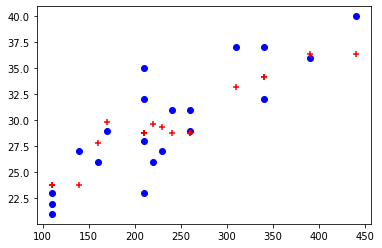

In [10]:
plt.scatter(test_buy.pay , y_test, marker='o' , c = 'blue')
plt.scatter(test_buy.pay , result , marker='+' , c = 'red')
plt.show()
